In [1]:
import warnings
warnings.simplefilter("ignore")

import sys
import os
import sklearn
import numpy as np

np.random.seed(42)

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saves to images
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<h1>Preprocessing</h1>
<p>MNIST</p>

In [2]:
import tensorflow as tf

In [3]:
# if tensorflow is not installed. use this
#pip install tensorflow

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
y_train.shape

(60000,)

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
#x_trainained to reduce the dimesions to 2. Otherwise SGD Classfier will not x_trainin
x_train = x_train.reshape((len(x_train),28*28))
x_test = x_test.reshape((len(x_test),28*28))

(-0.5, 27.5, 27.5, -0.5)

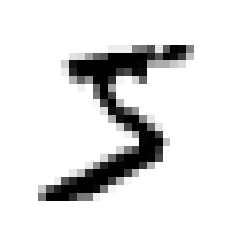

In [8]:
plt.imshow(x_train[0].reshape(28,28),cmap=mpl.cm.binary)
plt.axis("off")

In [9]:
y_train[0]

5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

SGD Clasifier is based on stochastic gradient descent formula.
Stochastic Graident Descent will optimse the cost function. Through we will able to find efficient model.
Stochastic Gardient Descent:<br>
&Delta;&Theta; -> &Theta;+&eta;	&part;f(&Theta;)/	&part;&Theta;<br>
&Theta; = old value <br>
&Delta;&Theta; = new value <br>
&eta; = Learning<br>

In [19]:
from sklearn.linear_model import SGDClassifier

#
# Max Iterations = 1000
# Tolerance = 0.0001
#
sgd_class = SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
sgd_class.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
somedigit = (x_train[0])
sgd_class.predict([somedigit])

array([ True])

<b>Cross  Validations<br>
Cross Validations will  help training several times the model on subsets of the available data. </b>

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_class,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

<b>
KFold cross validation.<br>
    These helps the models to learn several subssets(n-1) to train.
    Test nth subset take the results.
</b>

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,random_state=42)

for train_index, test_index in skfolds.split(x_train,y_train):
    clone_clf = clone(sgd_class)
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_fold = x_test[test_index]
    y_test_fold = y_test_5[test_index]
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    ncorrect = sum(y_pred == y_test_fold)
    print(ncorrect/len(y_pred))

IndexError: index 10000 is out of bounds for axis 0 with size 10000

***Cross Validations predictions

In [24]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_class,x_train,y_train_5,cv=3)

<b>
    The confusion matrix is veryful to find the precision and recall.<br>
    It will the spilt the. if we give correct answers, predicted answers.<br>
    TP:  true positive : correctly predicted as positive.<br>
    TN:  True Negative:  correctly predicted as negative.<br>
    FP:  False Positive: wrong predicted as Positive.<br>
    FN: False Negative: wrong predicted as negative.<br>
</b>

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

<b>
    Every model could work on precision or recall.
    <br>
    Means model precision/ correctness can be increased or. Recall/ wrongness can be decreased. Cannot do both at a time. While developing the model need to decide which one should be foucs on.
    <br>
</b>

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [27]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

<b>F1 formula</b>
![title](images/f1.svg)

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [29]:
y_scores = sgd_class.decision_function([somedigit])
y_scores

array([2164.22030239])

In [31]:
threshold = 100
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [32]:
y_scores = cross_val_predict(sgd_class,x_train,y_train_5,cv=3,method="decision_function")

<b>
   This model trying to increase the precision upto 90% of all the time.So, here we are trying to finding the thresholds.
</b>

In [33]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

Saving figure precision_recall_vs_threshold_plot


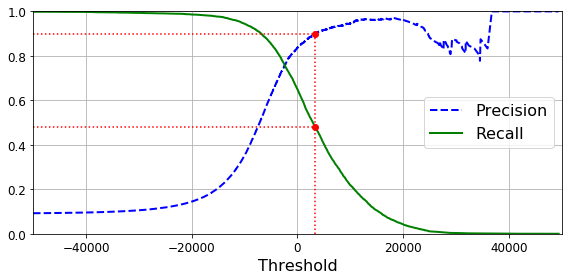

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

In [35]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


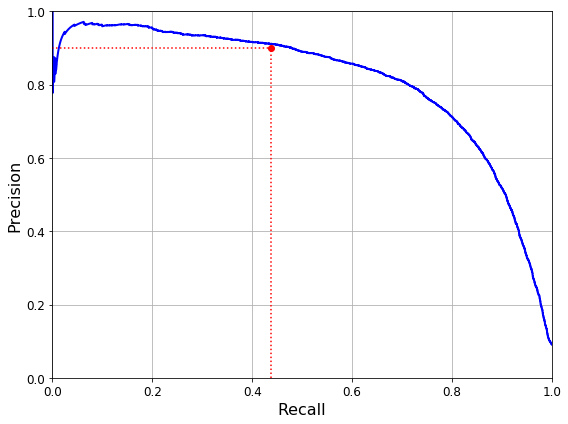

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [38]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [39]:
y_train_pred_90 = (y_scores > threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [40]:
precision_score(y_train_5, y_train_pred_90)

0.9

In [41]:
recall_score(y_train_5,y_train_pred_90)

0.47980077476480354

***ROC Curves
<b></b>

In [42]:
from sklearn.metrics import roc_curve
#fpr = false positive rate
#tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


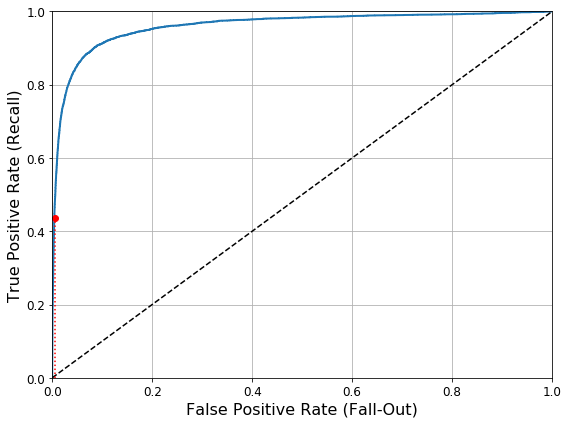

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") 
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  
plt.plot([4.837e-3], [0.4368], "ro")               
save_fig("roc_curve_plot")                         
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Y_probas_forest[:,0] : will give false class
Y_probas_forest[:,1] : will give true class

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest = cross_val_predict(forest_clf,x_train,y_train_5, cv=3,method="predict_proba")

fpr = false positive rate
tpr = true positive rate 

In [46]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


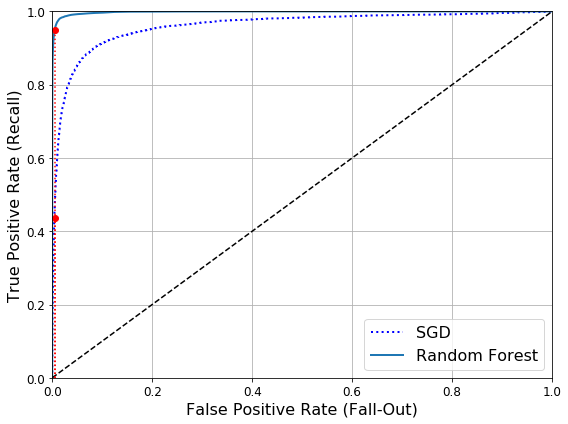

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [49]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [50]:
y_train_pred_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3)
precision_score(y_train_5,y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5,y_train_pred_forest)